# Linear SVM Classification

## Soft Margin Classification

In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica

svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42),
)

svm_clf.fit(X, y)

/home/julio/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

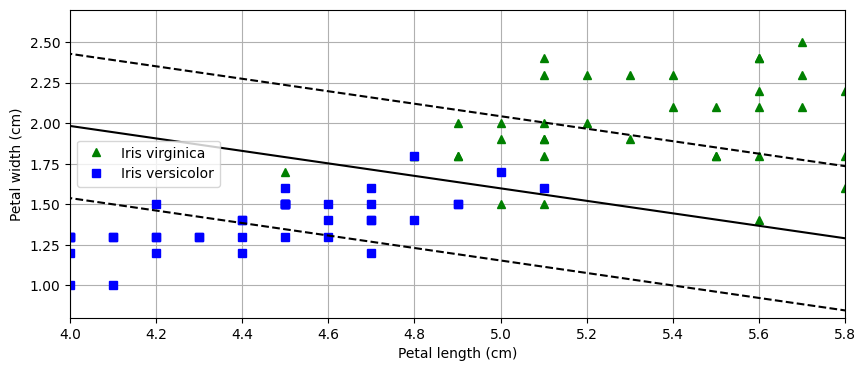

In [96]:
import matplotlib.pyplot as plt

# Convert to unscaled parameters
b = svc.decision_function([-scaler.mean_ / scaler.scale_])
w = svc.coef_[0] / scaler.scale_
# svc.intercept_ = np.array([b1])
# svc.coef_ = np.array([w1])

# w = svc.coef_[0]
# b = svc.intercept_[0]

x0 = np.linspace(0, 7, 200)
x1 = (-w[0]*x0 - b) / w[1] # Decision boundary

margin = 1 / w[1]
gutter_up = x1 + margin
gutter_down = x1 - margin

plt.figure(figsize=(10, 4))
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label="Iris virginica")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris versicolor")
plt.plot(x0, x1, "k-")
plt.plot(x0, gutter_up, "k--")
plt.plot(x0, gutter_down, "k--")

plt.axis([4.0, 5.8, 0.8, 2.7])
plt.legend(loc="center left")
plt.grid()
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.show()

In [3]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [4]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

# Nonlinear SVM Classification

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42),
)
polynomial_svm_clf.fit(X, y)

/home/julio/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

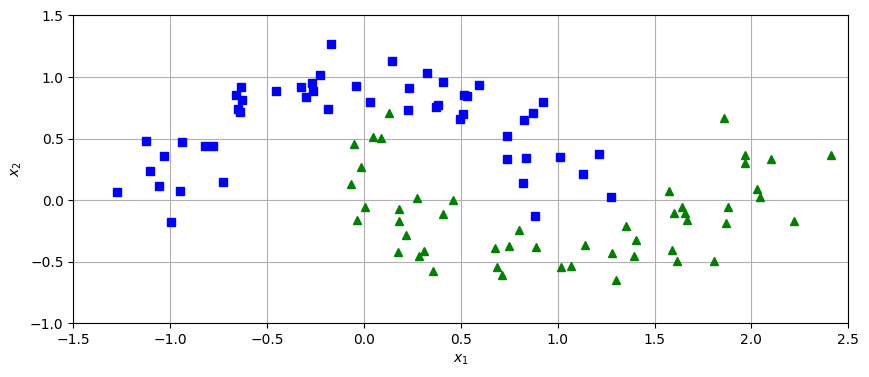

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")

axis = [-1.5, 2.5, -1.0, 1.5]
plt.axis(axis)
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## Polynomial Kernel

In [7]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5),
)
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

## Gaussian RBF Kernel

In [8]:
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=0.001),
)
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

# SVM Regression

## Linear

In [9]:
from sklearn.svm import LinearSVR
import numpy as np

np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector
y = y.ravel()

epsilon = 0.5

svm_reg = make_pipeline(
    StandardScaler(),
    LinearSVR(epsilon=epsilon, random_state=42),
)
svm_reg.fit(X, y)

/home/julio/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [10]:
X_new = np.array([[0], [2]])
y_predicted = svm_reg.predict(X_new)
y_predicted

array([4.07217776, 9.56922201])

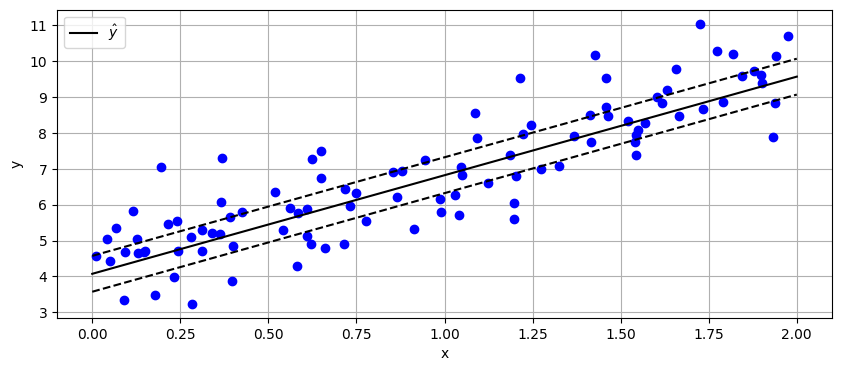

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(X, y, "bo")
plt.plot(X_new, y_predicted, "k-", label="$\hat{y}$")
plt.plot(X_new, y_predicted + epsilon, "k--")
plt.plot(X_new, y_predicted - epsilon, "k--")


plt.legend(loc="upper left")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Nonlinear

In [12]:
from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = (0.5 * (X ** 2)) + X + 2 + np.random.randn(m, 1)
y = y.ravel()

epsilon = 1

svm_poly_reg = make_pipeline(
    StandardScaler(),
    SVR(kernel="poly", degree=2, C=1, epsilon=epsilon),
)
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, degree=2, epsilon=1, kernel='poly'))])

In [13]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_predicted = svm_poly_reg.predict(X_new)
y_predicted

array([6.32592615, 6.11709106, 5.91279115, 5.7130264 , 5.51779683,
       5.32710243, 5.1409432 , 4.95931915, 4.78223026, 4.60967655,
       4.441658  , 4.27817463, 4.11922643, 3.9648134 , 3.81493554,
       3.66959285, 3.52878534, 3.39251299, 3.26077582, 3.13357382,
       3.01090699, 2.89277533, 2.77917884, 2.67011752, 2.56559138,
       2.4656004 , 2.3701446 , 2.27922397, 2.19283851, 2.11098822,
       2.0336731 , 1.96089315, 1.89264838, 1.82893877, 1.76976434,
       1.71512508, 1.66502099, 1.61945207, 1.57841832, 1.54191975,
       1.50995634, 1.48252811, 1.45963505, 1.44127716, 1.42745444,
       1.41816689, 1.41341451, 1.41319731, 1.41751527, 1.42636841,
       1.43975672, 1.4576802 , 1.48013885, 1.50713267, 1.53866166,
       1.57472583, 1.61532516, 1.66045967, 1.71012935, 1.7643342 ,
       1.82307422, 1.88634941, 1.95415978, 2.02650531, 2.10338602,
       2.1848019 , 2.27075295, 2.36123917, 2.45626056, 2.55581712,
       2.65990886, 2.76853576, 2.88169784, 2.99939509, 3.12162

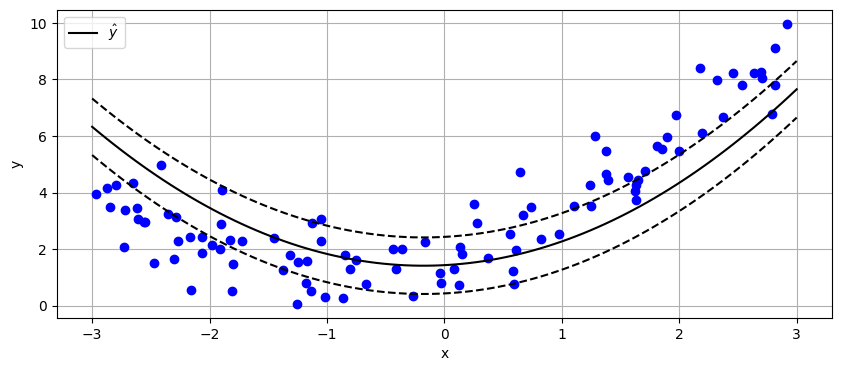

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(X, y, "bo")
plt.plot(X_new, y_predicted, "k-", label="$\hat{y}$")
plt.plot(X_new, y_predicted + epsilon, "k--")
plt.plot(X_new, y_predicted - epsilon, "k--")


plt.legend(loc="upper left")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Exercises

## 1-8

1. What is the fundamental idea behind support vector machines?<br>
R. To make predictions, either classification or regression, by fitting the data into a defined margin-range.
2. What is a support vector?<br>
R. It's the vector that defines "the edge of the street" that are in bound with the predictions.
3. Why is it important to scale the inputs when using SVMs?<br>
R. Because if they are unscaled the support vectors could be too far away or too close with each other, making a bad decision boundary what affect the predictions.
4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?<br>
R. Yes, but require extra training. In sklearn in could be done using SVC class, setting the probability hypterparameter to True.
5. How can you choose between LinearSVC, SVC, and SGDClassifier?<br>
R. Depending on the amount of data and how many features there are.
6. Say you've trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease $\gamma$ (gamma)? What about C?<br>
R. Increase both $\gamma$ and C.
7. What does it mean for a model to be $\epsilon$-insensitive?<br>
R. It means that if more training data are added to the model will not affect the predictions because there are within the margins.
8. What is the point of using the kernel trick?<br>
R. To avoid the tranformation on all the training data and just compute the dot product with the original vectors (plus other operations), thus reducing the computations to be made (improving the time).

## 9

In [143]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_svc = LinearSVC(C=1, random_state=42).fit(X_scaled, y)
svc = SVC(kernel="linear", C=1, random_state=42).fit(X_scaled, y)
sgd = SGDClassifier(alpha = 0.05, random_state=42).fit(X_scaled, y)

/home/julio/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


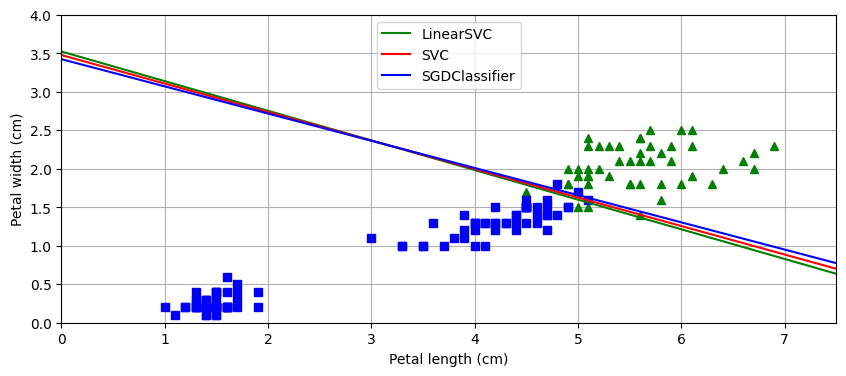

In [144]:
import matplotlib.pyplot as plt

def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_svc_decision_boundary = compute_decision_boundary(lin_svc)
svc_decision_boundary = compute_decision_boundary(svc)
sgd_decision_boundary = compute_decision_boundary(sgd)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^") #, label="Iris virginica")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs") #, label="Iris versicolor")
plt.plot(lin_svc_decision_boundary[:, 0], lin_svc_decision_boundary[:, 1], "g-", label = "LinearSVC")
plt.plot(svc_decision_boundary[:, 0], svc_decision_boundary[:, 1], "r-", label = "SVC")
plt.plot(sgd_decision_boundary[:, 0], sgd_decision_boundary[:, 1], "b-", label = "SGDClassifier")

plt.axis([0.0, 7.5, 0.0, 4.0])
plt.legend(loc="upper center")
plt.grid()
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.show()